In [1]:
import pandas as pd

import sys
import os

import numpy as np
import pandas as pd

import cv2
import PIL as Image
from scipy import ndimage, misc
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("../")

from utils import myImg2 as myimg
from utils import config as cutil


In [6]:
#initialize key variables.

cdir = '/disk1/data1/ret/gpu_tf/'
ddir = '/disk1/data1/data/'
imgdir = ddir  + 'px_lab_he77/'
o_imgdir = ddir + 'lab_he77/ex/'
model_dir = ddir + 'models/inception/'
model_name = 'incep_lab_he77.cpkt'
iconfig = cutil.Config(configid='c1',cdir=cdir)

In [3]:
#get Image
def get_img(ipath):
    return myimg.myImg( imageid=ipath, config=iconfig, path=ipath)


In [4]:
#get image form npy
def get_img_from_npy(ipath):
    return np.load(ipath)

img_id[IDRiD_050_1728] sum ti_im[5113.835294117647] size ti_im[(128, 128)] max pi[255.0]


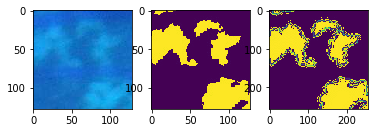

In [10]:
#display patches
def show_patch(img_id,patch_id):
    '''
    oi_im = get_img_from_npy( imgdir + img_id + '_' + patch_id + '_oi.npy')
    ti_im = get_img_from_npy( imgdir + img_id + '_' + patch_id + '_ti.npy')
    '''
    for i in range(4000):
      if os.path.exists(imgdir + img_id + '_' + str(i) + '_oi.npy'):
        oi_im = get_img_from_npy( imgdir + img_id + '_' + str(i) + '_oi.npy')
        ti_im = get_img_from_npy( imgdir + img_id + '_' + str(i) + '_ti.npy')
        if (ti_im/255).sum() > 5000:
            print("img_id[{}] sum ti_im[{}] size ti_im[{}] max pi[{}]".
                  format(img_id + '_' + str(i),ti_im.sum()/255,ti_im.shape,ti_im.max())) 
            ti2 = ndimage.zoom(ti_im,2)
            show_images([oi_im.astype(np.uint8),ti_im.astype(np.uint8),ti2.astype(np.uint8)])
            break
    
    '''
    #stack images side by side
    img_hstack = np.hstack((oi_im, ti_im))
    img_hconcat = np.concatenate((oi_im, ti_im), axis=1)
    cv2.imshow(' img_hconcat patch - [' + str(i) + ']', img_hconcat.astype(np.float32)/255) 
    '''
    #show_images([oi_im.astype(np.uint8),ti_im])
    #print(oi_im)
    #print(ti_im)
    
show_patch('IDRiD_050','1815')

In [9]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i])

    plt.show(block=True)
    
def show_main_image(img_id):
    o_img = get_img(o_imgdir + 'images/' + img_id + '.jpg').getImage()
    t_img = get_img(o_imgdir + 'gt/' + img_id + '_HE.jpg').getImage()
    other_dir = 'idrid/IDRID_sharable_data/images_with_ground_truth/DRIVE/training_HE/1st_manual/'
    other_img = get_img(ddir + other_dir + img_id + '_HE.jpg').getImage()
    i1 = ndimage.zoom(other_img,2)
    #i2 = ndimage.zoom(other_img,3)
    #i3 = ndimage.zoom(other_img,4)
    
    show_images([o_img,t_img,other_img,i1])

#idrid/IDRID_sharable_data/images_with_ground_truth/DRIVE/training_HE/1st_manual/IDRiD_50_HE.jpg
img_id = 'IDRiD_050'
show_main_image(img_id)

AttributeError: 'NoneType' object has no attribute 'size'